In [ ]:
# run benchmark
!python auto_website_benchmark.py ./chromium_version.txt ./website.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import copy as cpy
import numpy as np
%matplotlib inline



In [133]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_30_08_2017_11_50_21.pkl"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print(benchmark_data)

{(u'Yahoo_Sport', u'group_optimized_experiment', 1504055825.399394): object
CSSSelector                            77.113201
ComputedStyle                         121.323581
InvalidationSet                       167.791014
LayoutObject                          102.528736
Node                                   96.000000
StyleBackgroundData                     4.213166
StyleBoxData                           12.475096
StyleInheritedData                     14.826890
StyleMultiColData                       0.195054
StylePropertySet                        7.763149
StyleRareInheritedLayer0Data            2.652734
StyleRareInheritedLayer0SubData         0.741205
StyleRareInheritedLayer1Data            0.055730
StyleRareNonInheritedLayer0Data        18.725183
StyleRareNonInheritedLayer0SubData     33.070010
StyleRareNonInheritedLayer1Data         9.961686
StyleRareNonInheritedLayer2Data         0.289794
StyleSurroundData                      31.515152
StyleVisualData                         1.

In [134]:
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

['Website', 'ChromiumVersion', 'TimeStamp', 'Total', 'TotalStyle']
set(['ComputedStyle', 'ChromiumVersion', 'StyleRareNonInheritedLayer1Data', 'StyleTransformData', 'StyleRareNonInheritedLayer2Data', 'StyleFilterOpsData', 'Website', 'StyleDeprecatedFlexibleBoxData', 'CSSSelector', 'StyleSurroundData', 'StyleFlexibleBoxData', 'StyleBoxData', 'StyleRareInheritedLayer1Data', 'Node', 'TimeStamp', 'LayoutObject', 'StyleBackgroundData', 'InvalidationSet', 'StyleWillChangeData', 'StyleInheritedData', 'StyleRareInheritedLayer0SubData', 'StyleRareNonInheritedLayer0Data', 'TotalStyle', 'StyleMultiColData', 'StyleRareInheritedLayer0Data', 'StyleRareNonInheritedLayer0SubData', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', 'Total', 'StyleVisualData'])


In [135]:
non_style_fields = ['Website', 'ChromiumVersion', 'TimeStamp', 'Total', \
                    'TotalStyle', 'CSSSelector', 'LayoutObject', 'InvalidationSet', \
                    'Node'
                   ]
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i not in non_style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].mean()

    CSSSelector             ChromiumVersion  ComputedStyle  InvalidationSet  \
0     77.113201  group_optimized_experiment     121.323581       167.791014   
1      3.240497                    original      62.751453         3.425812   
2     85.362162  group_optimized_experiment      90.118919        46.962162   
3    333.453453  group_optimized_experiment     127.723724       699.099099   
4    768.838287                    original      84.804030       147.869018   
5     62.616289  group_optimized_experiment     100.182480       135.415617   
6     62.198941                    original      99.049317       134.878796   
7     76.631938  group_optimized_experiment      56.363908        34.878875   
8     69.811029  group_optimized_experiment      85.917808        71.452055   
9     19.469269  group_optimized_experiment     102.605117        36.883144   
10     8.730309  group_optimized_experiment      15.816746        10.542993   
11     8.427887                    original      14.

In [53]:
benchmark_dataframe.to_csv("benchmark.csv")

In [22]:
# benchmark_dataframe.groupby(["Website"]).plot.bar(x="ChromiumVersion", y="Total")

46.3580264452 9.94214193797
-18.4960769282 302.449637121
Model score:  3.41987635541
32.3105466697


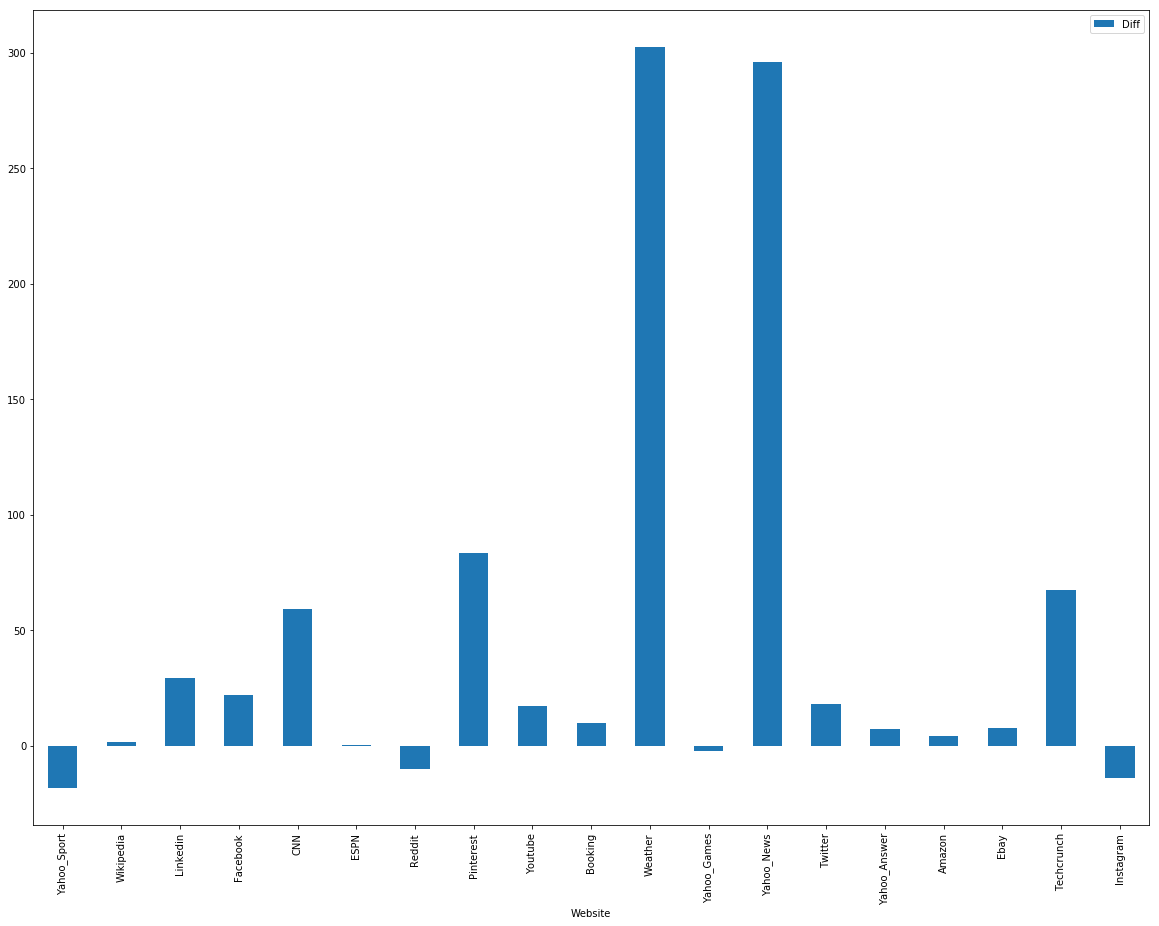

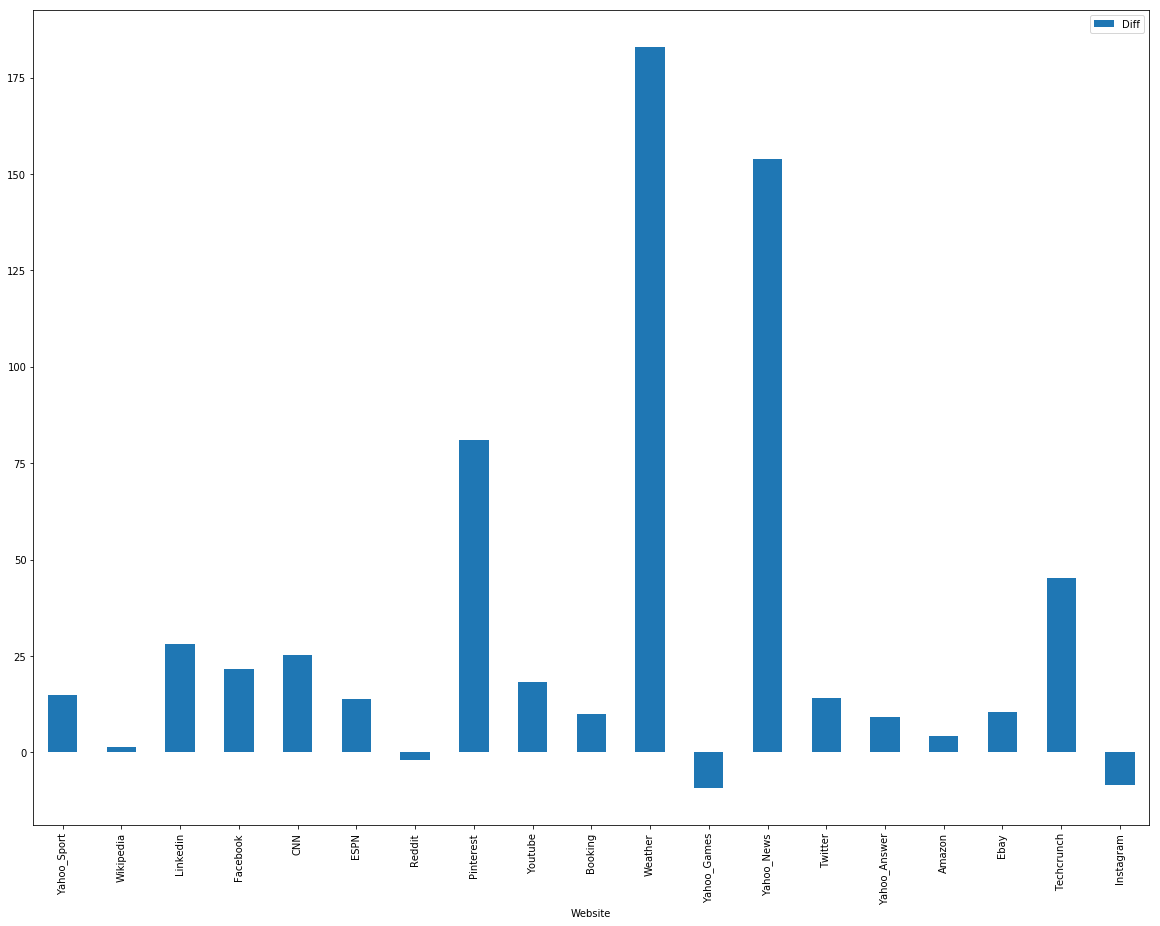

In [136]:
website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].Total.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].Total.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"]), np.median(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))
print min(website_diff_dataframe["Diff"]), max(website_diff_dataframe["Diff"])
print "Model score: ", (np.mean(website_diff_dataframe["Diff"]) 
                        + np.median(website_diff_dataframe["Diff"])
                        + max(website_diff_dataframe["Diff"])
                       ) / (1
                            * (np.linalg.norm(website_diff_dataframe[website_diff_dataframe["Diff"] < 0]["Diff"]) +1)
                            * sum(website_diff_dataframe["Diff"] < 0)
                           )

website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].TotalStyle.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].TotalStyle.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))

In [166]:
np.linalg.norm(website_diff_dataframe[website_diff_dataframe["Diff"] < 0]["Diff"])

0.0

In [17]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_param"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print benchmark_data
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

style_fields = ['ComputedStyle', 'StyleTransformData', 'StyleFilterOpsData', \
                'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleFlexibleBoxData', \
                'StyleBoxData', 'StyleBackgroundData', 'StyleWillChangeData', 'StyleInheritedData', \
                'StyleMultiColData', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', \
                'StyleVisualData']
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i in style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe.iloc[benchmark_dataframe.groupby("Website", as_index=False)["Total"].idxmin()]
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].median()
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].count()

IOError: [Errno 2] No such file or directory: './mini_benchmark_param'